# Whisker deep nets responses analysis

Script to analyze responses of whisker nets

## Important imports

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pylab

from scipy import misc
import os
import time
import gridfs
import cPickle

In [102]:
from sklearn import manifold

In [113]:
from nltk.corpus import wordnet as wn

In [2]:
import pymongo as pm
conn = pm.MongoClient(port=27017)

In [4]:
conn['whisker_net']['catenet.files'].distinct('exp_id')

[u'catenet_adag_flv_slac_fea_2']

In [143]:
def get_sort_top3(top1_conmat):
    name_list_top3 = []
    for indx_tmp in xrange(117):
        curr_row = list(top1_conmat[indx_tmp])
        curr_row[indx_tmp] = 0
        new_row = sorted(enumerate(curr_row), key=lambda x: x[1])
        name_orig = cate_dict[indx_tmp]
        name_top3 = []
        for indx_tmp2 in xrange(3):
            name_top3.append((cate_dict[new_row[-1 - indx_tmp2][0]], 
                              int(new_row[-1 - indx_tmp2][1]*1.0/np.sum(data_label==indx_tmp)*10000)*1.0/10000))
        name_list_top3.append((int(top1_conmat[indx_tmp, indx_tmp]*1.0/np.sum(data_label==indx_tmp)*10000)*1.0/10000, name_orig, name_top3))

    name_list_top3.sort()
    #print(name_list_top3)
    for item in name_list_top3:
        print(item)
    
    return name_list_top3

## Spatial-temporal convolution networks

Use the responses from network `catenet_adag_flv_slac_3`, step `305000`

In [20]:
curr_expid = 'catenet_adag_flv_slac_fea_2'

dbname = 'whisker_net'
colname = 'catenet.files'
find_res = conn[dbname][colname].find({'exp_id': curr_expid, 'validation_results': {'$exists': True}})

In [83]:
find_res_inter = conn[dbname][colname].find({'exp_id': curr_expid, 
                                             'validation_results.topn.intermediate_steps': {'$exists': True}})
#find_res_inter = conn[dbname][colname].find({'exp_id': curr_expid, 
#                                             'validation_results.topn': {'$exists': True}})

In [84]:
find_res_inter.count()

0

In [70]:
find_res.count()

43

In [71]:
idval = find_res[42]['_id']

In [72]:
coll = conn[dbname][colname]
fn = coll.find({'item_for': idval})[0]['filename']

In [73]:
fs = gridfs.GridFS(coll.database, 'catenet')
fh = fs.get_last_version(fn)
saved_data = cPickle.loads(fh.read())
fh.close()

In [76]:
len(saved_data['validation_results']['topn']['label'])

10

In [74]:
saved_data['validation_results']['topn']['label'][0].shape

(128,)

In [75]:
saved_data['validation_results']['topn']['label'][0]

array([  9,   9,   9,   9,   9,   9,   9,   9,  29,  29,  29,  29,  29,
        29,  29,  29,  18,  18,  18,  18,  18,  18,  18,  18,  56,  56,
        56,  56,  56,  56,  56,  56,  23,  23,  23,  23,  23,  23,  23,
        23,  85,  85,  85,  85,  85,  85,  85,  85,  52,  52,  52,  52,
        52,  52,  52,  52, 109, 109, 109, 109, 109, 109, 109, 109,  71,
        71,  71,  71,  71,  71,  71,  71,  70,  70,  70,  70,  70,  70,
        70,  70,  17,  17,  17,  17,  17,  17,  17,  17,   4,   4,   4,
         4,   4,   4,   4,   4,  55,  55,  55,  55,  55,  55,  55,  55,
       115, 115, 115, 115, 115, 115, 115, 115,  27,  27,  27,  27,  27,
        27,  27,  27,  74,  74,  74,  74,  74,  74,  74,  74])

In [59]:
idval = find_res[38]['_id']
coll = conn[dbname][colname]
fn = coll.find({'item_for': idval})[0]['filename']
fs = gridfs.GridFS(coll.database, 'catenet')
fh = fs.get_last_version(fn)
saved_data = cPickle.loads(fh.read())
fh.close()

In [60]:
saved_data['validation_results']['topn']['label'][0]

array([  9,   9,   9,   9,   9,   9,   9,   9,  29,  29,  29,  29,  29,
        29,  29,  29,  18,  18,  18,  18,  18,  18,  18,  18,  56,  56,
        56,  56,  56,  56,  56,  56,  23,  23,  23,  23,  23,  23,  23,
        23,  85,  85,  85,  85,  85,  85,  85,  85,  52,  52,  52,  52,
        52,  52,  52,  52, 109, 109, 109, 109, 109, 109, 109, 109,  71,
        71,  71,  71,  71,  71,  71,  71,  70,  70,  70,  70,  70,  70,
        70,  70,  17,  17,  17,  17,  17,  17,  17,  17,   4,   4,   4,
         4,   4,   4,   4,   4,  55,  55,  55,  55,  55,  55,  55,  55,
       115, 115, 115, 115, 115, 115, 115, 115,  27,  27,  27,  27,  27,
        27,  27,  27,  74,  74,  74,  74,  74,  74,  74,  74])

In [61]:
all_arr = np.asarray(saved_data['validation_results']['topn']['label'])

In [62]:
np.sum(all_arr==0)

176

In [63]:
np.sum(all_arr==100)

184

In [64]:
all_arr_0 = all_arr

In [65]:
np.sum(all_arr==0)

176

In [85]:
perf_list = [(0.0, 9), (0.0, 61), (0.0013736263736263737, 81), (0.001736111111111111, 15), (0.0027472527472527475, 64), (0.0027472527472527475, 91), (0.002976190476190476, 30), (0.004120879120879121, 46), (0.004120879120879121, 63), (0.004120879120879121, 104), (0.0050675675675675678, 23), (0.005208333333333333, 21), (0.0054945054945054949, 36), (0.0054945054945054949, 73), (0.0054945054945054949, 114), (0.0060483870967741934, 2), (0.0064935064935064939, 26), (0.006868131868131868, 78), (0.006868131868131868, 108), (0.006868131868131868, 109), (0.006868131868131868, 116), (0.008241758241758242, 54), (0.0086805555555555559, 22), (0.0096153846153846159, 38), (0.0096153846153846159, 112), (0.011904761904761904, 4), (0.012362637362637362, 44), (0.013719512195121951, 27), (0.015151515151515152, 10), (0.016483516483516484, 83), (0.017123287671232876, 20), (0.017857142857142856, 107), (0.018333333333333333, 24), (0.019230769230769232, 47), (0.020604395604395604, 115), (0.023351648351648352, 75), (0.02389705882352941, 13), (0.024725274725274724, 62), (0.0260989010989011, 40), (0.03021978021978022, 110), (0.03313253012048193, 29), (0.034340659340659344, 93), (0.034340659340659344, 100), (0.034836065573770489, 1), (0.035714285714285712, 35), (0.035714285714285712, 66), (0.035714285714285712, 106), (0.03787878787878788, 8), (0.042582417582417584, 101), (0.043956043956043959, 65), (0.043956043956043959, 80), (0.04807692307692308, 90), (0.050824175824175824, 58), (0.054435483870967742, 3), (0.054945054945054944, 105), (0.058908045977011492, 32), (0.059065934065934064, 92), (0.060714285714285714, 19), (0.061688311688311688, 25), (0.061813186813186816, 39), (0.065934065934065936, 94), (0.067307692307692304, 34), (0.067307692307692304, 71), (0.067307692307692304, 102), (0.071428571428571425, 41), (0.081043956043956047, 96), (0.083333333333333329, 11), (0.085164835164835168, 57), (0.087912087912087919, 88), (0.097527472527472528, 103), (0.097560975609756101, 0), (0.098901098901098897, 82), (0.10302197802197802, 55), (0.10302197802197802, 85), (0.11263736263736264, 52), (0.12225274725274725, 48), (0.125, 50), (0.13920454545454544, 33), (0.13992537313432835, 12), (0.14423076923076922, 86), (0.14972527472527472, 79), (0.15934065934065933, 95), (0.16071428571428573, 69), (0.16346153846153846, 89), (0.18131868131868131, 70), (0.18664383561643835, 16), (0.18681318681318682, 59), (0.18835616438356165, 18), (0.19093406593406592, 99), (0.2087912087912088, 84), (0.21703296703296704, 98), (0.25412087912087911, 45), (0.26648351648351648, 56), (0.275390625, 5), (0.27884615384615385, 53), (0.28708791208791207, 76), (0.29120879120879123, 42), (0.29120879120879123, 111), (0.29945054945054944, 74), (0.29945054945054944, 97), (0.29999999999999999, 7), (0.30769230769230771, 49), (0.31777108433734941, 28), (0.32417582417582419, 43), (0.33379120879120877, 67), (0.34065934065934067, 72), (0.35027472527472525, 37), (0.37362637362637363, 77), (0.39560439560439559, 68), (0.41620879120879123, 51), (0.42045454545454547, 31), (0.44230769230769229, 87), (0.46607142857142858, 14), (0.52226027397260277, 17), (0.56868131868131866, 113), (0.65384615384615385, 6), (0.7101648351648352, 60)]

In [86]:
len(perf_list)

117

In [87]:
perf_arr = np.asarray(perf_list)

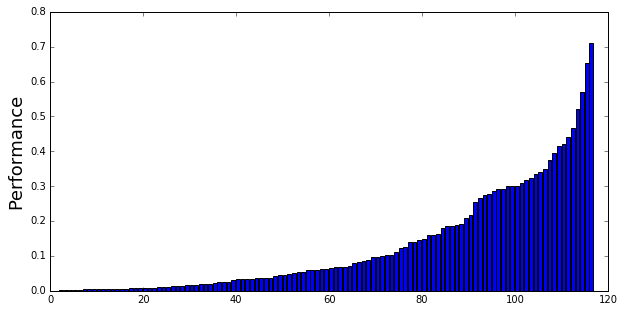

In [91]:
fig = plt.figure(figsize=(10, 5))
plt.bar(range(117), perf_arr[:, 0])
plt.ylabel('Performance', fontsize = 18)

In [92]:
data = cPickle.load(open('response_fcadd.pkl', 'r'))

In [93]:
data.shape

(79848, 117)

In [94]:
data_label = cPickle.load(open('response_label.pkl', 'r'))

In [95]:
data_label.shape

(79848,)

# Top1 confusion matrix related

In [127]:
top1_conmat = np.zeros([117, 117])

In [128]:
argmax_fcadd = np.argmax(data, 1)

In [130]:
for indx_tmp in xrange(len(data_label)):
    top1_conmat[int(data_label[indx_tmp]), int(argmax_fcadd[indx_tmp])] = top1_conmat[int(data_label[indx_tmp]), int(argmax_fcadd[indx_tmp])] + 1

In [131]:
top1_conmat

array([[ 32.,   0.,   0., ...,   0.,   0.,   1.],
       [  0.,  17.,   0., ...,   1.,   0.,   6.],
       [  1.,   1.,   3., ...,   0.,   3.,   0.],
       ..., 
       [  4.,   3.,   0., ...,   4.,   1.,   3.],
       [  3.,   0.,   1., ...,   0.,  15.,   0.],
       [  8.,   4.,   0., ...,   1.,   1.,   5.]])

In [132]:
perf_list

[(0.0, 9),
 (0.0, 61),
 (0.0013736263736263737, 81),
 (0.001736111111111111, 15),
 (0.0027472527472527475, 64),
 (0.0027472527472527475, 91),
 (0.002976190476190476, 30),
 (0.004120879120879121, 46),
 (0.004120879120879121, 63),
 (0.004120879120879121, 104),
 (0.005067567567567568, 23),
 (0.005208333333333333, 21),
 (0.005494505494505495, 36),
 (0.005494505494505495, 73),
 (0.005494505494505495, 114),
 (0.006048387096774193, 2),
 (0.006493506493506494, 26),
 (0.006868131868131868, 78),
 (0.006868131868131868, 108),
 (0.006868131868131868, 109),
 (0.006868131868131868, 116),
 (0.008241758241758242, 54),
 (0.008680555555555556, 22),
 (0.009615384615384616, 38),
 (0.009615384615384616, 112),
 (0.011904761904761904, 4),
 (0.012362637362637362, 44),
 (0.013719512195121951, 27),
 (0.015151515151515152, 10),
 (0.016483516483516484, 83),
 (0.017123287671232876, 20),
 (0.017857142857142856, 107),
 (0.018333333333333333, 24),
 (0.019230769230769232, 47),
 (0.020604395604395604, 115),
 (0.0233516

In [133]:
per_list_2 = []
for indx_tmp in xrange(117):
    per_list_2.append((top1_conmat[indx_tmp, indx_tmp]*1.0/np.sum(data_label==indx_tmp), indx_tmp))
    
per_list_2.sort()
print(per_list_2)

[(0.0, 9), (0.0, 61), (0.0013736263736263737, 81), (0.001736111111111111, 15), (0.0027472527472527475, 64), (0.0027472527472527475, 91), (0.002976190476190476, 30), (0.004120879120879121, 46), (0.004120879120879121, 63), (0.004120879120879121, 104), (0.0050675675675675678, 23), (0.005208333333333333, 21), (0.0054945054945054949, 36), (0.0054945054945054949, 73), (0.0054945054945054949, 114), (0.0060483870967741934, 2), (0.0064935064935064939, 26), (0.006868131868131868, 78), (0.006868131868131868, 108), (0.006868131868131868, 109), (0.006868131868131868, 116), (0.008241758241758242, 54), (0.0086805555555555559, 22), (0.0096153846153846159, 38), (0.0096153846153846159, 112), (0.011904761904761904, 4), (0.012362637362637362, 44), (0.013719512195121951, 27), (0.015151515151515152, 10), (0.016483516483516484, 83), (0.017123287671232876, 20), (0.017857142857142856, 107), (0.018333333333333333, 24), (0.019230769230769232, 47), (0.020604395604395604, 115), (0.023351648351648352, 75), (0.02389

In [139]:
name_list_top3 = []
for indx_tmp in xrange(117):
    curr_row = list(top1_conmat[indx_tmp])
    curr_row[indx_tmp] = 0
    new_row = sorted(enumerate(curr_row), key=lambda x: x[1])
    name_orig = cate_dict[indx_tmp]
    name_top3 = []
    for indx_tmp2 in xrange(3):
        name_top3.append((cate_dict[new_row[-1 - indx_tmp2][0]], 
                          int(new_row[-1 - indx_tmp2][1]*1.0/np.sum(data_label==indx_tmp)*10000)*1.0/10000))
    name_list_top3.append((int(top1_conmat[indx_tmp, indx_tmp]*1.0/np.sum(data_label==indx_tmp)*10000)*1.0/10000, name_orig, name_top3))
    
name_list_top3.sort()
#print(name_list_top3)
for item in name_list_top3:
    print(item)

(0.0, u'cruiser', [(u'convertible', 0.3543), (u'tender', 0.0837), (u'earphone', 0.0604)])
(0.0, u'drafting_table', [(u'console_table', 0.2859), (u'kitchen_table', 0.0984), (u'straight_chair', 0.089)])
(0.0013, u'sport_utility', [(u'convertible', 0.2953), (u'car', 0.0892), (u'earphone', 0.0837)])
(0.0017, u'ferry', [(u'tender', 0.2986), (u'cruise_ship', 0.1649), (u'knife', 0.0555)])
(0.0027, u'sedan', [(u'convertible', 0.2843), (u'boat', 0.0961), (u'tender', 0.0686)])
(0.0027, u'stove', [(u'vertical_file', 0.1195), (u'console_table', 0.0906), (u'microwave', 0.0618)])
(0.0029, u'pendulum_clock', [(u'console_table', 0.1101), (u'tender', 0.0535), (u'clock', 0.052)])
(0.0041, u'beach_wagon', [(u'convertible', 0.2472), (u'tender', 0.0796), (u'boat', 0.0755)])
(0.0041, u'file', [(u'vertical_file', 0.2733), (u'console_table', 0.1785), (u'tweeter', 0.0576)])
(0.0041, u'loudspeaker', [(u'vertical_file', 0.1785), (u'console_table', 0.1098), (u'tweeter', 0.0604)])
(0.005, u'cabin_cruiser', [(u'ten

# Top 5 confusion matrix related

In [142]:
top5_conmat = np.zeros([117, 117])
for indx_tmp in xrange(len(data_label)):
    curr_row = list(data[indx_tmp])
    new_row = sorted(enumerate(curr_row), key=lambda x: -x[1])
    for indx_tmp2 in xrange(5):
        top5_conmat[int(data_label[indx_tmp]), int(new_row[indx_tmp2][0])] = top5_conmat[int(data_label[indx_tmp]), int(new_row[indx_tmp2][0])] + 1

In [145]:
get_sort_top3(top5_conmat);

(0.0219, u'stove', [(u'console_table', 0.3173), (u'tweeter', 0.2802), (u'vertical_file', 0.2486)])
(0.026, u'beach_wagon', [(u'convertible', 0.4546), (u'car', 0.3461), (u'roadster', 0.32)])
(0.0267, u'pendulum_clock', [(u'console_table', 0.2678), (u'tender', 0.1592), (u'bookshelf', 0.1398)])
(0.0274, u'sport_utility', [(u'convertible', 0.5343), (u'car', 0.4368), (u'roadster', 0.3956)])
(0.0343, u'jeep', [(u'convertible', 0.3598), (u'roadster', 0.2829), (u'tender', 0.2046)])
(0.0456, u'upright', [(u'console_table', 0.5416), (u'cabinet', 0.25), (u'coffee_table', 0.246)])
(0.0467, u'printer', [(u'tweeter', 0.2486), (u'console_table', 0.2458), (u'vertical_file', 0.1936)])
(0.0486, u'ambulance', [(u'convertible', 0.4184), (u'roadster', 0.3263), (u'car', 0.2118)])
(0.0584, u'camera', [(u'convertible', 0.131), (u'tweeter', 0.1229), (u'mug', 0.1209)])
(0.0757, u'limousine', [(u'tender', 0.5587), (u'cruise_ship', 0.4981), (u'sea_boat', 0.3901)])
(0.0769, u'cruiser', [(u'convertible', 0.5837), (

In [146]:
print(cate_dict)

{0: u'cap', 1: u'table-tennis_table', 2: u'camera', 3: u'school_bus', 4: u'upright', 5: u'data_input_device', 6: u'floor_lamp', 7: u'folding_chair', 8: u'basket', 9: u'drafting_table', 10: u'limousine', 11: u'remote_control', 12: u'microphone', 13: u'grand_piano', 14: u'soda_can', 15: u'ferry', 16: u'birdhouse', 17: u'earphone', 18: u'kitchen_table', 19: u'lawn_chair', 20: u'platform_bed', 21: u'secretary', 22: u'ambulance', 23: u'cabin_cruiser', 24: u'coffee_mug', 25: u'pool_table', 26: u'stock_car', 27: u'bag', 28: u'dagger', 29: u'sea_boat', 30: u'pendulum_clock', 31: u'vertical_file', 32: u'roadster', 33: u'rocking_chair', 34: u'dishwasher', 35: u'mailbox', 36: u'jeep', 37: u'pillow', 38: u'piano', 39: u'convertible', 40: u'monitor', 41: u'jar', 42: u'sailboat', 43: u'delta_wing', 44: u'love_seat', 45: u'cruise_ship', 46: u'beach_wagon', 47: u'yacht', 48: u'revolver', 49: u'mug', 50: u'berth', 51: u'wine_bottle', 52: u'propeller_plane', 53: u'helmet', 54: u'printer', 55: u'microwav

# Old script for draw things

In [97]:
num_cate = 117

In [96]:
aggre_arr = np.zeros([num_cate, num_cate])

In [98]:
for data_indx in xrange(data_label.size):
    label_now = int(data_label[data_indx])
    aggre_arr[label_now] = aggre_arr[label_now] + data[data_indx]

for label_now in xrange(num_cate):
    aggre_arr[label_now] = aggre_arr[label_now]/np.sum(data_label==label_now)
    

In [99]:
dis_matrix = 1 - np.corrcoef(aggre_arr)

In [100]:
dis_matrix.shape

(117, 117)

In [104]:
mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=0,
                   dissimilarity="precomputed", n_jobs=1)

In [105]:
pos = mds.fit(dis_matrix).embedding_

In [106]:
pos.shape

(117, 2)

In [116]:
cate_info_path = '../cmd_gen_mp4/category_info.txt'

fin = open(cate_info_path, 'r')
lines = fin.readlines()

cate_dict = {}

for line in lines:
    split_line = line.split()
    indx_cate_now = int(split_line[0])
    label_inter = split_line[1]
    if label_inter[0]=='[':
        label_int = int(label_inter[3:11])
    else:
        label_int = int(label_inter[1:])
    
    syn_now = wn._synset_from_pos_and_offset('n',label_int)
    cate_dict[indx_cate_now] = syn_now.name().split('.')[0]

In [117]:
cate_dict

{0: u'cap',
 1: u'table-tennis_table',
 2: u'camera',
 3: u'school_bus',
 4: u'upright',
 5: u'data_input_device',
 6: u'floor_lamp',
 7: u'folding_chair',
 8: u'basket',
 9: u'drafting_table',
 10: u'limousine',
 11: u'remote_control',
 12: u'microphone',
 13: u'grand_piano',
 14: u'soda_can',
 15: u'ferry',
 16: u'birdhouse',
 17: u'earphone',
 18: u'kitchen_table',
 19: u'lawn_chair',
 20: u'platform_bed',
 21: u'secretary',
 22: u'ambulance',
 23: u'cabin_cruiser',
 24: u'coffee_mug',
 25: u'pool_table',
 26: u'stock_car',
 27: u'bag',
 28: u'dagger',
 29: u'sea_boat',
 30: u'pendulum_clock',
 31: u'vertical_file',
 32: u'roadster',
 33: u'rocking_chair',
 34: u'dishwasher',
 35: u'mailbox',
 36: u'jeep',
 37: u'pillow',
 38: u'piano',
 39: u'convertible',
 40: u'monitor',
 41: u'jar',
 42: u'sailboat',
 43: u'delta_wing',
 44: u'love_seat',
 45: u'cruise_ship',
 46: u'beach_wagon',
 47: u'yacht',
 48: u'revolver',
 49: u'mug',
 50: u'berth',
 51: u'wine_bottle',
 52: u'propeller_p

In [125]:
for item_tmp in perf_list:
    cate_tmp = item_tmp[1]
    print(cate_dict[cate_tmp], item_tmp[0])

(u'drafting_table', 0.0)
(u'cruiser', 0.0)
(u'sport_utility', 0.0013736263736263737)
(u'ferry', 0.001736111111111111)
(u'stove', 0.0027472527472527475)
(u'sedan', 0.0027472527472527475)
(u'pendulum_clock', 0.002976190476190476)
(u'beach_wagon', 0.004120879120879121)
(u'file', 0.004120879120879121)
(u'loudspeaker', 0.004120879120879121)
(u'cabin_cruiser', 0.005067567567567568)
(u'secretary', 0.005208333333333333)
(u'jeep', 0.005494505494505495)
(u'planter', 0.005494505494505495)
(u'chair', 0.005494505494505495)
(u'camera', 0.006048387096774193)
(u'stock_car', 0.006493506493506494)
(u'racer', 0.006868131868131868)
(u'rifle', 0.006868131868131868)
(u'desk', 0.006868131868131868)
(u'table', 0.006868131868131868)
(u'printer', 0.008241758241758242)
(u'ambulance', 0.008680555555555556)
(u'piano', 0.009615384615384616)
(u'lamp', 0.009615384615384616)
(u'upright', 0.011904761904761904)
(u'love_seat', 0.012362637362637362)
(u'bag', 0.013719512195121951)
(u'limousine', 0.015151515151515152)
(u'ea

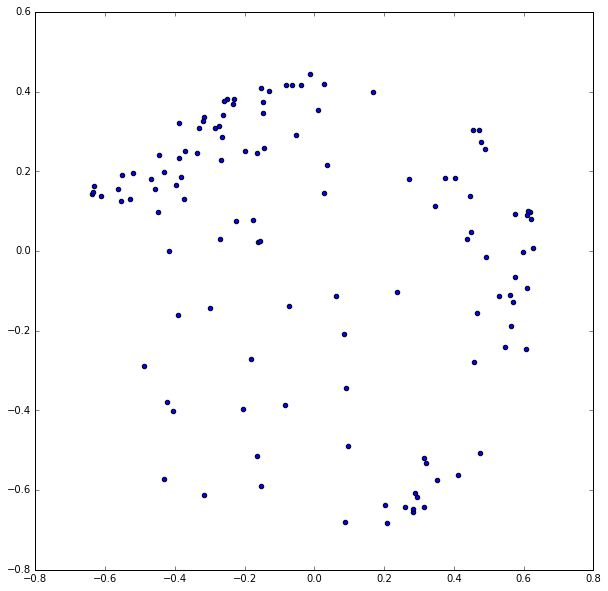

In [120]:

fig = plt.figure(figsize=(10, 10))
plt.scatter(pos[:, 0], pos[:, 1])

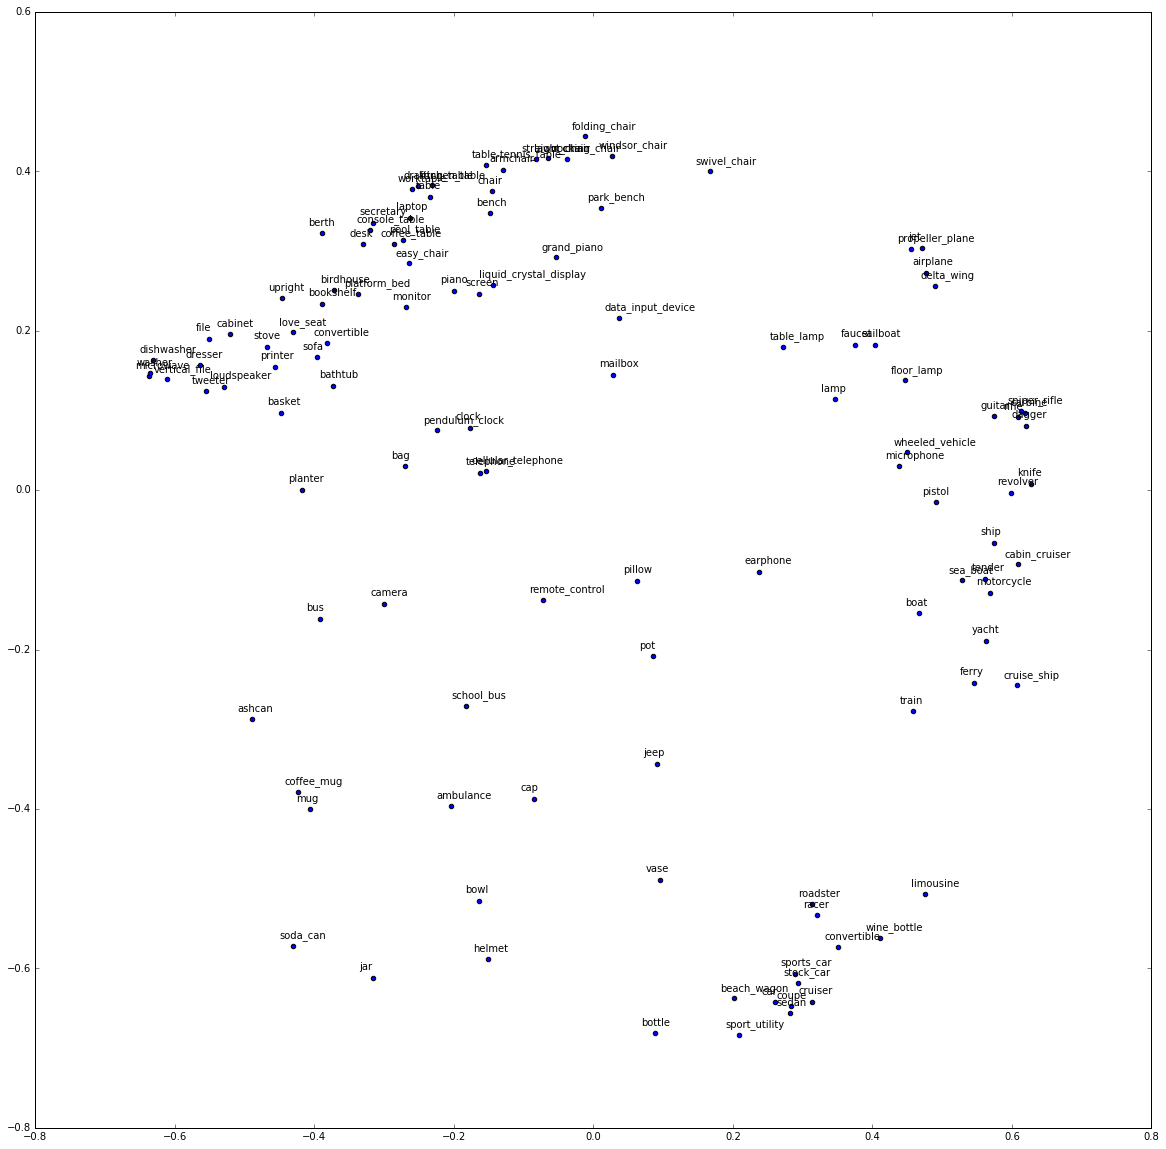

In [122]:

fig = plt.figure(figsize=(20, 20))
plt.scatter(pos[:, 0], pos[:, 1])
for indx_cate in xrange(num_cate):
    plt.text(pos[indx_cate, 0] - 0.02, pos[indx_cate, 1] + 0.01, cate_dict[indx_cate])